# Raspagem de Dados

## Inicialização

In [23]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import lxml.html
import time
import pandas as pd
import matplotlib.pyplot as plt

## Contrução do Crawler

In [94]:
class crawlerLyrics:
    def __init__(self):
        self.service = Service(ChromeDriverManager().install())
        self.browser = webdriver.Chrome(service=self.service)
        self.songs_link = []
        self.songs_names = []
        self.songs_artists = []
        self.lyrics = []
        
    def openPage(self, url = r'https://www.letras.mus.br/mais-acessadas/'):
        self.browser.get(url = url)
        time.sleep(1)
        
    def saveLinks(self):
        a_elements = self.browser.find_elements(By.XPATH,
                                        '//*[@id="js-cnt-tops"]/div[3]/div[1]/ol/li/a')        
          
        for a in a_elements:
           self.songs_link.append(a.get_attribute('href'))
             
        return self.songs_link
    
    def getInfo(self,url_song:str):
        self.browser.get(url= url_song)
        time.sleep(1)
        # Pegando o Título pelo xpath
        title = self.browser.find_element(By.XPATH,
                                         r'/html/body/div[1]/div[1]/div[1]/div[5]/article/div[1]/div[2]/div[2]/div/h1')
        self.songs_names.append(title.text)
        
        # O mesmo com artista
        artist = self.browser.find_element(By.XPATH,
                                          r'/html/body/div[1]/div[1]/div[1]/div[5]/article/div[1]/div[2]/div[2]/div/a/h2')
        self.songs_artists.append(artist.text)
        
        #Agora a letra
        lyric = self.browser.find_element(By.XPATH,
                                         r'/html/body/div[1]/div[1]/div[1]/div[5]/article/div[2]/div[2]')
        self.lyrics.append(lyric.text)
            
#         return [title.text,artist.text,lyric.text]
        
    def rollLinkList(self):
        for link in self.songs_link:
            self.getInfo(url_song = link) 
        self.browser.quit()
        

In [95]:
haverster = crawlerLyrics()
haverster.openPage()
links = haverster.saveLinks()
haverster.rollLinkList()

In [103]:
data = {'Title':haverster.songs_names,
       'Artist':haverster.songs_artists,
       'Lyrics':haverster.lyrics}

In [104]:
df = pd.DataFrame(data)
df.head()

,Title,Artist,Lyrics
0,Tu és + Águas Purificadoras (part. Débora Rabe...,Florianópolis House Of Prayer (fhop music),Junto ao poço estava eu\nQuando um homem judeu...
1,BLUE,Billie Eilish,"Mmm, mmm, mmm\nI try\nTo live in black and whi..."
2,CHIHIRO,Billie Eilish,"To take my love away\nWhen I come back around,..."
3,Sagrado Profano (part. KayBlack),Luísa Sonza,Dirijo sozinha pela tua rua\nDeitada na cama c...
4,Escape,Renascer Praise,O inimigo tenta laços e embaraços\nPra me enve...


In [105]:
df.to_csv('songs.csv',index=True)

# Tratamento dos dados

In [65]:
df = pd.read_csv('songs.csv',sep=',')
df.set_index('Unnamed: 0',inplace=True)
df.head()

,Title,Artist,Lyrics
Unnamed: 0,,,
0,Tu és + Águas Purificadoras (part. Débora Rabe...,Florianópolis House Of Prayer (fhop music),Junto ao poço estava eu\nQuando um homem judeu...
1,BLUE,Billie Eilish,"Mmm, mmm, mmm\nI try\nTo live in black and whi..."
2,CHIHIRO,Billie Eilish,"To take my love away\nWhen I come back around,..."
3,Sagrado Profano (part. KayBlack),Luísa Sonza,Dirijo sozinha pela tua rua\nDeitada na cama c...
4,Escape,Renascer Praise,O inimigo tenta laços e embaraços\nPra me enve...


In [91]:
for col in df.columns:
    df[col] = df[col].apply(lambda x: x.lower())
    df[col] = df[col].apply(lambda x : x.replace('\n',' '))

In [92]:
df.isna().sum()

Title     0
Artist    0
Lyrics    0
dtype: int64

In [93]:
df.head()

,Title,Artist,Lyrics
Unnamed: 0,,,
0,tu és + águas purificadoras (part. débora rabe...,florianópolis house of prayer (fhop music),junto ao poço estava eu quando um homem judeu ...
1,blue,billie eilish,"mmm, mmm, mmm i try to live in black and white..."
2,chihiro,billie eilish,"to take my love away when i come back around, ..."
3,sagrado profano (part. kayblack),luísa sonza,dirijo sozinha pela tua rua deitada na cama co...
4,escape,renascer praise,o inimigo tenta laços e embaraços pra me enver...


# Criando Corpus

In [95]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = list(df['Lyrics'].values)
vectorizer = CountVectorizer()
vectorizer.fit(corpus)

CountVectorizer()

In [96]:
vocab = vectorizer.get_feature_names_out()
bow = vectorizer.transform(corpus)
data_bow = pd.DataFrame(data=bow.toarray(),
                       columns=vocab)
data_bow

,011,085,10,100k,11,12,14,15,150,18,...,혼돈을,혼란스러운,혼자,홈런은,후회는,휩쓸린,흐릿한,흠뻑,히비리,힘으로
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Palavras Mais Comuns

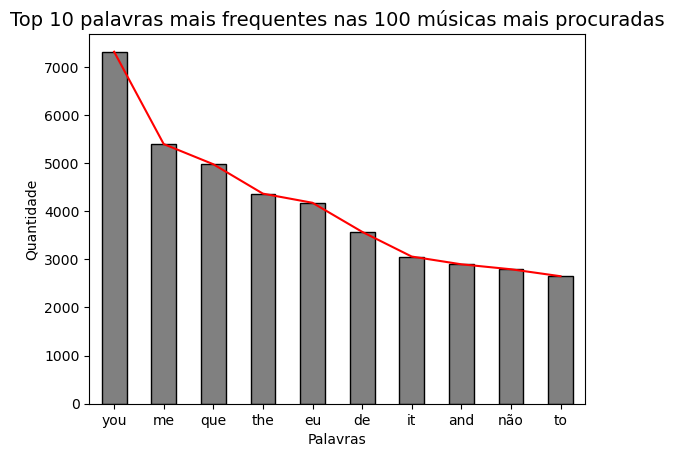

In [97]:
data_bow.iloc[:,:-1].sum().sort_values(ascending=False).head(10).plot(kind='bar',
                                                         color='grey',
                                                         edgecolor='black')

data_bow.iloc[:,:-1].sum().sort_values(ascending=False).head(10).plot(kind='line',
                                                         color='red')

plt.ylabel('Quantidade')
plt.xlabel('Palavras')

plt.title('Top 10 palavras mais frequentes nas 100 músicas mais procuradas',
         fontsize=14)

plt.show()

# Clusterização

## Analisando Elbow Curve

In [98]:
from sklearn.cluster import KMeans
data_bow_info = data_bow.iloc[:,:-1].copy()

In [99]:
X = data_bow_info.values.copy()

In [100]:
inercia = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    inercia.append(kmeans.inertia_)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows wi

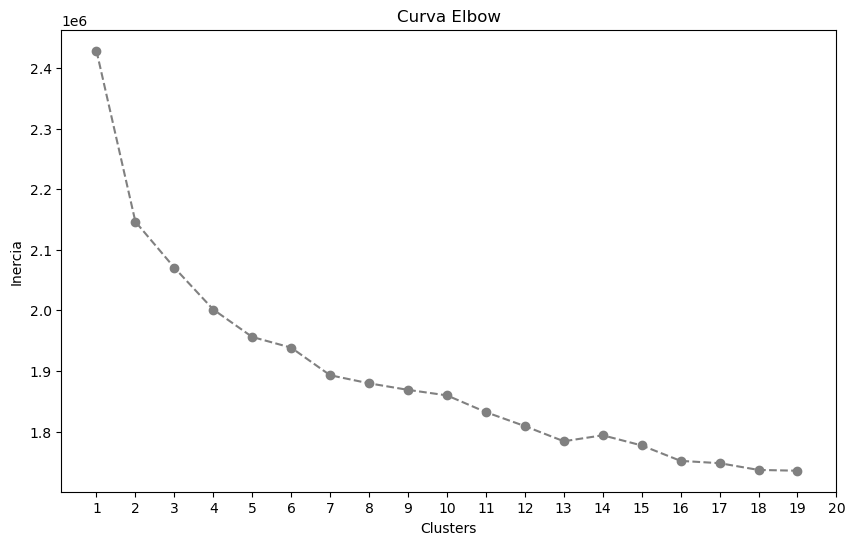

In [116]:
plt.figure(figsize=(10,6))

plt.plot(range(1,20),inercia,marker='o',
         linestyle='--',
         color='grey')
plt.xlabel('Clusters')
plt.ylabel('Inercia')
plt.title('Curva Elbow')

plt.xticks(list(range(1,21)))

plt.show()

<hr>
Pela análise, parece que o ideal seria em torno de 13 clusters, logo, seguiremos dessa maneira!
<hr>

In [117]:
kmeans_final = KMeans(n_clusters=13)
kmeans_final.fit(X)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


KMeans(n_clusters=13)

In [118]:
pred = kmeans_final.predict(X)
centroides = kmeans_final.cluster_centers_

In [119]:
data_bow['Cluster'] = pred
data_bow['Cluster'].value_counts()

0     465
11    202
7     150
10    102
6      45
8      11
2       9
12      7
1       5
9       1
4       1
3       1
5       1
Name: Cluster, dtype: int64

## Checando qual o padrão entre as músicas mais procuradas
 Analisaremos os 3 maiores Clusters, por serem os mais representativos.

### Mais Popular
Note que, nessa classe, temos uma têndencia à musicas de cunho religioso.

In [120]:
index = data_bow[data_bow['Cluster'] == 0].index
df.loc[index]['Artist'].value_counts().head()

harpa cristã          76
aline barros          13
músicas católicas     10
cassiane              10
shirley carvalhaes    10
Name: Artist, dtype: int64

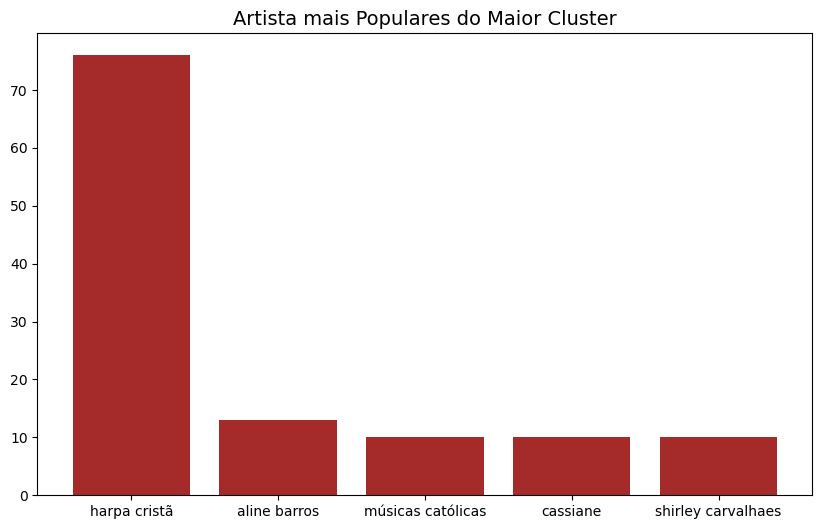

In [135]:
plt.figure(figsize=(10,6))

plt.bar(df.loc[index]['Artist'].value_counts().head().index,
       df.loc[index]['Artist'].value_counts().head().values,
       color='brown')

plt.title('Artista mais Populares do Maior Cluster',fontsize=14)

plt.show()

### Segundo Mais Popular
Já nessa, algo mais proximo de um pop ou rock mais lento.

In [123]:
index2 = data_bow[data_bow['Cluster'] == 11].index
df.loc[index2]['Artist'].value_counts().head()

billie eilish    10
coldplay          9
lana del rey      5
the beatles       5
pink floyd        4
Name: Artist, dtype: int64

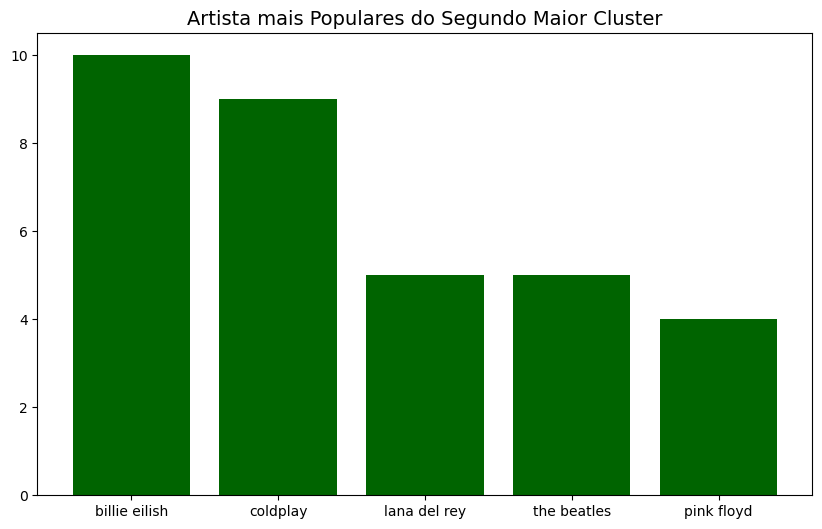

In [136]:
plt.figure(figsize=(10,6))

plt.bar(df.loc[index2]['Artist'].value_counts().head().index,
       df.loc[index2]['Artist'].value_counts().head().values,
       color='darkgreen')

plt.title('Artista mais Populares do Segundo Maior Cluster',fontsize=14)

plt.show()

### Terceiro Mais Popular
Aqui, já notamos uma têndencia total voltada ao pop.

In [126]:
index3 = data_bow[data_bow['Cluster'] == 7].index
df.loc[index3]['Artist'].value_counts().head()

taylor swift     15
billie eilish     6
bruno mars        5
lana del rey      5
rihanna           4
Name: Artist, dtype: int64

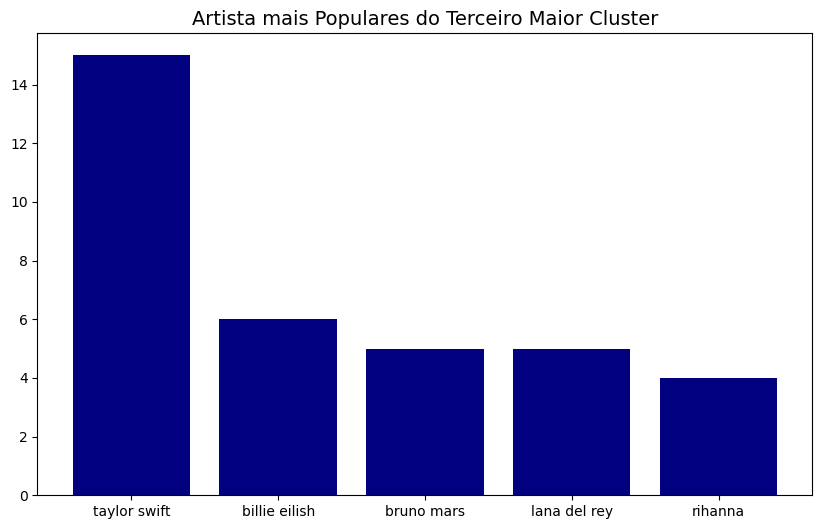

In [137]:
plt.figure(figsize=(10,6))

plt.bar(df.loc[index3]['Artist'].value_counts().head().index,
       df.loc[index3]['Artist'].value_counts().head().values,
       color='navy')

plt.title('Artista mais Populares do Terceiro Maior Cluster',fontsize=14)

plt.show()

# Usando t-SNE para Visualização

In [146]:
from sklearn.manifold import TSNE

In [147]:
tsne = TSNE(random_state=42)
X_tsne = tsne.fit_transform(X)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


C:\Users\user\AppData\Local\Temp\ipykernel_23992\3332068197.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('nipy_spectral',10)


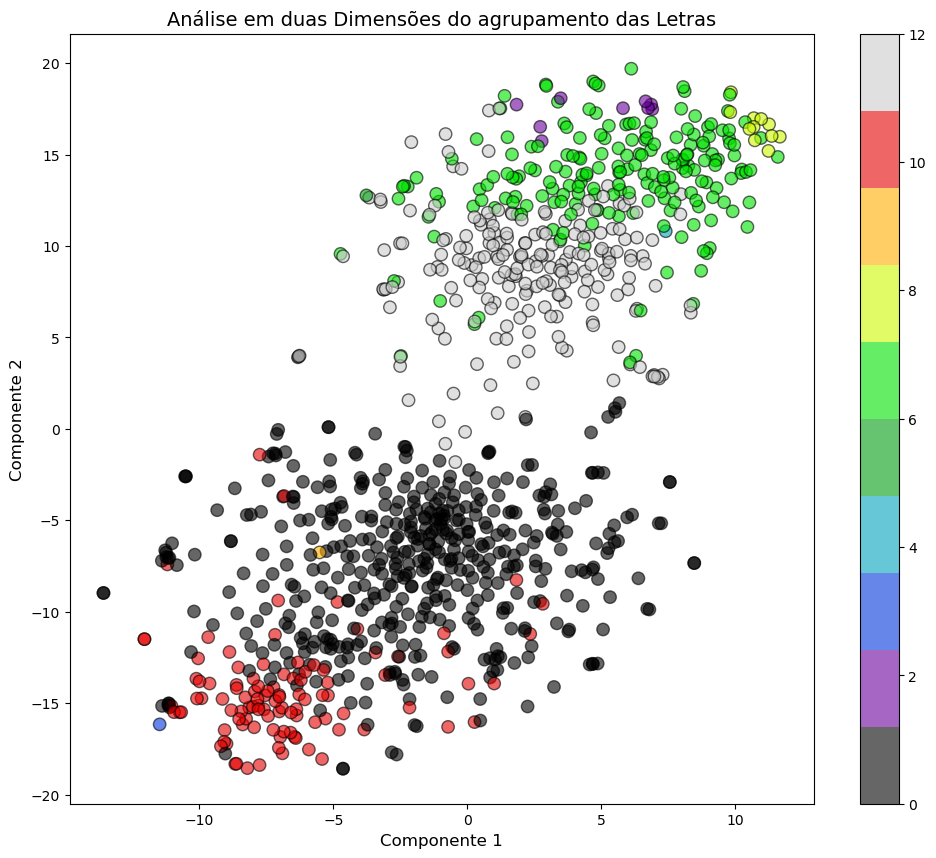

In [157]:
plt.figure(figsize=(12,10))

cmap=plt.cm.get_cmap('nipy_spectral',10)

plt.scatter(X_tsne[:,0],X_tsne[:,1],
            c=data_bow['Cluster'],edgecolor='black',
            alpha=0.6,s=80,
            cmap=cmap)

plt.title('Análise em duas Dimensões do agrupamento das Letras',
         fontsize=14)

plt.xlabel('Componente 1',fontsize=12)
plt.ylabel('Componente 2',fontsize=12)

plt.colorbar()

plt.show()